# Automate Value Machine  

AVM or Automated value machines are algorithms used to value houses based off of area, size, selldate and more. 
They are often used in mass valuations and are more accurate than human appraisors. The following AVM makes use house prices alone, and shows how machin learning can be used to plot value considerations for the end user. 

In [125]:
import csv
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy

Importing housing price and area data to build a statistical model, find the average area for each house in the global data set. 

In [126]:
target_directory = r'C:\GitHub\Land-value-GIS\backups'

HOUSEDATA = "house_price_and_area.csv"

path = os.path.join(target_directory, HOUSEDATA)

listformatted = []

x = []
y = []

with open(path, "r") as r:
    reader = csv.reader(r)
    next(reader)
    for row in reader:
        if len(row)> 1:
            listformatted.append(row)

for sublist in listformatted:
    sublist[0] = int(sublist[0])
    sublist[1] = int(sublist[1])
    x.append(sublist[0])
    y.append(sublist[1])

houses = pd.read_csv(path)

X = numpy.array(x)
Y = numpy.array(y)
print(X, Y)

[ 1020000  1500000   949000   500000   460000   630000   490000   860000
   760000   460000   600000  1020000  1195000  1390000   745000  1190000
  1300000  3500000   750000  1250000   665000   799000  1850000   835000
   835000   550000   465000   470000   750000   410000   550000   695000
   780000  2500000   750000  1295000   735000   700000  1700000   899000
   825000  1490000  1050000   910000   380000  2650000  1352000   564590
   835000  1020000   970000   830000   880000   850000  1249000   985000
   860000   620000   730000  1250000   499000   731000   850000  1195000
  1099000  1350000   291000   655000   725000  1600000   850000  1199900
  3800000  1599000  2400000  1150000   895000  1895000  1680000   595000
   560000   550000   600000  1800000   650000   895000   900000   120000
   550000   720000   860000  1149000   680000  1475000   460000  1250000
   490000  1260000   950000   999000   570000   280000   680000   850000
   590000  2294000  2450000        0   699000   550

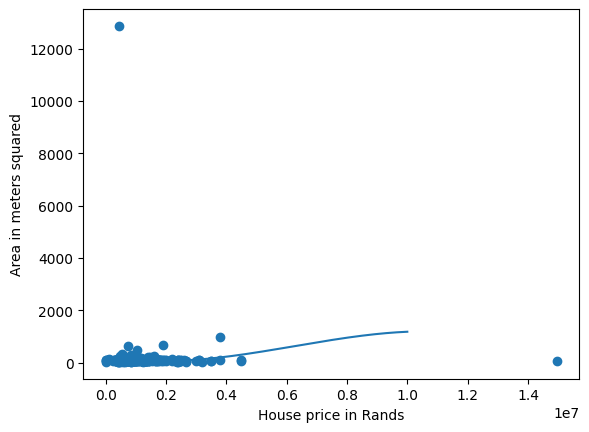

In [127]:
mymodel = numpy.poly1d(numpy.polyfit(X, Y, 3))
myline = numpy.linspace(80000, 10000000, 10000000)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.xlabel("House price in Rands")
plt.ylabel("Area in meters squared")
plt.show()

The following packages are used to data clean, organize and compute. CSV is used to open files commonly used in excel, oS is for use of the operating system, Matplot and Pandas are 2 data science modules that help with large data manipulation. 

In [128]:
locations_price_paths = [
    "prop_westerncape_locations_price.csv",
    "prop_eastern_cape_locations_price.csv",
    "prop_freestate_locations_price.csv",
    "prop_gauteng_locations_price.csv",
    "prop_kwazulu_natal_locations_price.csv",
    "prop_limpopo_locations_price.csv",
    "prop_mpumalanga_locations_price.csv",
    "prop_northern_cape_locations_price.csv",
    "prop_northwest_locations_price.csv"
]

target_directory = r'C:\GitHub\Land-value-GIS\backups'

pricelist = []

for file in locations_price_paths:
    full = os.path.join(target_directory, file)
    with open(full, "r") as r:
        reader = csv.reader(r)
        next(reader)
        for row in reader:
            if len(row) > 1:
                pricelist.append(row)
    break

for pair in pricelist:
    pair.remove(pair[1])
    

for number in pricelist:
    if number == 0:
        pricelist.remove(number)
    try:
        int(number[0])
    except:
        pricelist.remove(number)

pricelist = [int(price) for sublist in pricelist for price in sublist if price.isdigit()]

def removeOs():
    for number in pricelist:
        if number == 0:
            pricelist.remove(number)
        elif number > 9999999:
            pricelist.remove(number)
        elif number < 400000:
            pricelist.remove(number)

for i in range(20):
    removeOs()

pricelist.sort()

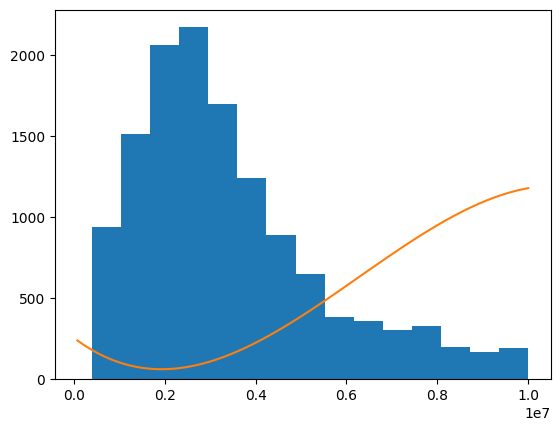

In [129]:
mymodel = numpy.poly1d(numpy.polyfit(X, Y, 3))
myline = numpy.linspace(80000, 10000000, 10000000)

plt.hist(pricelist, 15)
plt.plot(myline, mymodel(myline))
plt.show()

400000 179.86481069050518 2223.8924804934923
400000 179.86481069050518 2223.8924804934923
400000 179.86481069050518 2223.8924804934923
400000 179.86481069050518 2223.8924804934923
400000 179.86481069050518 2223.8924804934923
400000 179.86481069050518 2223.8924804934923
403000 179.37532705960746 2246.6857990234116
420000 176.62241464265088 2377.9541280180083
429999 175.0197258222448 2456.8602080700302
429999 175.0197258222448 2456.8602080700302
430000 175.0195661479387 2456.8681631660206
440000 173.4289227641888 2537.0624056649867
449999 171.85062079748542 2618.5474216604316
449999 171.85062079748542 2618.5474216604316
450000 171.85046356001544 2618.5556365569314
450000 171.85046356001544 2618.5556365569314
450000 171.85046356001544 2618.5556365569314
450000 171.85046356001544 2618.5556365569314
450000 171.85046356001544 2618.5556365569314
450000 171.85046356001544 2618.5556365569314
450000 171.85046356001544 2618.5556365569314
450000 171.85046356001544 2618.5556365569314
450000 171.850

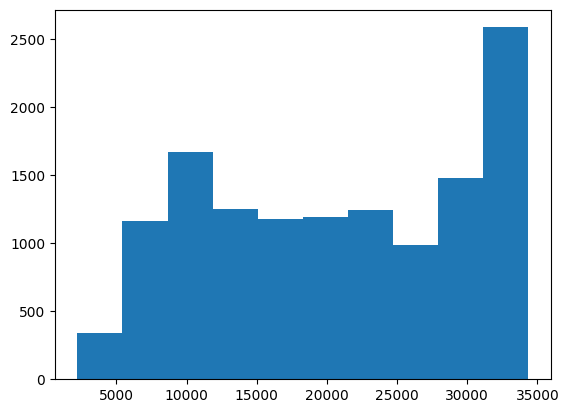

In [130]:
ave_price_area = []
for price in pricelist:
    print(price, mymodel(price), price/mymodel(price))
    ave_price_area.append(price/mymodel(price))

plt.hist(ave_price_area, 10)
plt.show()

In [131]:
houses.head()
houses.shape

(377, 3)

In [132]:
houses["location"].value_counts()

location
Sunnyside            11
Ferndale              9
Montana               9
Sandown               8
Sandton Central       8
                     ..
Moregloed             1
Krugersrus            1
Northcliff            1
Willow Park Manor     1
Lynnwood Ridge        1
Name: count, Length: 200, dtype: int64

In [133]:
houses.dtypes

price        int64
area         int64
location    object
dtype: object

In [134]:
file = "house_price_and_area_test.csv"

In [135]:
full = os.path.join(target_directory, file)

In [136]:
test = pd.read_csv(full)

In [137]:
test.head()

,price,area,location
0,240000,135,Melrose North
1,899000,104,Klippoortje
2,720000,97,Floracliffe
3,950000,82,Hatfield
4,799000,76,Klippoortje


In [138]:
test = test.dropna(how='all')
# Drop rows with NaN values
test = test.dropna(axis=0)

In [139]:
test["location_code"] = test["location"].astype("category").cat.codes
test.head()

,price,area,location,location_code
0,240000,135,Melrose North,25
1,899000,104,Klippoortje,21
2,720000,97,Floracliffe,11
3,950000,82,Hatfield,17
4,799000,76,Klippoortje,21


In [140]:
houses["location_code"] = houses["location"].astype("category").cat.codes
houses

,price,area,location,location_code
0,1020000,61,Erand Gardens,50
1,1500000,92,Bergbron,14
2,949000,99,Montana,116
3,500000,49,Oakdene,132
4,460000,40,Bardene,7
...,...,...,...,...
372,660000,60,Theresapark,181
373,575000,95,Bedford Gardens,9
374,665000,50,Pretoria Central,144
375,2395000,80,Magalieskruin,107


In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1 )

In [143]:
train = houses

In [144]:
predictor = ["price", "area"]

In [145]:
rf.fit(train[predictor], train["area"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [146]:
preds = rf.predict(test[predictor])

In [147]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test['area'], preds)

In [148]:
acc

0.5394736842105263

In [149]:
combined = pd.DataFrame(dict(actual=test['area'], prediction=preds))

In [150]:
pd.crosstab(index=combined['actual'], columns=["prediction"])

col_0,prediction
actual,
34,2
35,2
36,1
43,1
44,1
47,1
48,2
50,2
54,2


In [151]:
combined

,actual,prediction
0,135,123
1,104,104
2,97,97
3,82,82
4,76,76
...,...,...
71,114,116
72,207,114
73,116,116
74,71,71
